In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

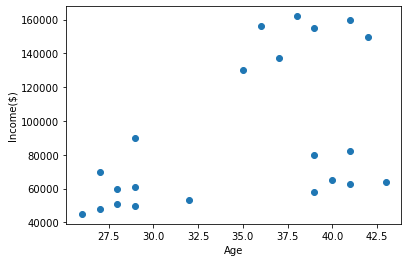

In [91]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [92]:
from sklearn.cluster import KMeans

In [93]:
kmean = KMeans(n_clusters=3)
y_predicted = kmean.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [94]:
df['Cluster']=y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [95]:
kmean.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [96]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

In [97]:
df1

,Name,Age,Income($),Cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


In [98]:
len(df1),len(df2),len(df3)

(11, 7, 4)

Text(0, 0.5, 'Income($)')

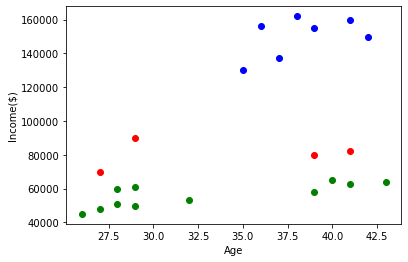

In [99]:
plt.scatter(df1['Age'],df1['Income($)'], color='g')
plt.scatter(df2['Age'],df2['Income($)'], color='b')
plt.scatter(df3['Age'],df3['Income($)'], color='r')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scalar = MinMaxScaler()

scalar.fit(df[['Age']])

df['Age'] = scalar.transform(df[['Age']])

scalar.fit(df[['Income($)']])

df['Income($)'] = scalar.transform(df[['Income($)']])

In [102]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [103]:
len(df1),len(df2),len(df3)

(11, 7, 4)

In [104]:
kmean = KMeans(n_clusters=3)
y_predicted = kmean.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [105]:
df['Cluster']=y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [106]:
kmean.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [107]:
kmean.cluster_centers_[:,0]

array([0.85294118, 0.1372549 , 0.72268908])

In [108]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

In [109]:
df1

,Name,Age,Income($),Cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
21,Abdul,0.764706,0.111111,0


Text(0, 0.5, 'Income($)')

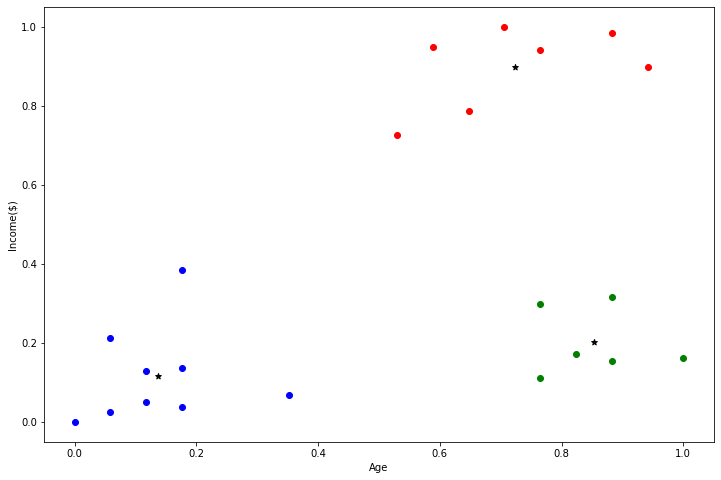

In [110]:
plt.figure(figsize=(12,8))
plt.scatter(df1['Age'],df1['Income($)'], color='g')
plt.scatter(df2['Age'],df2['Income($)'], color='b')
plt.scatter(df3['Age'],df3['Income($)'], color='r')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [111]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Arayan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [112]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26217927623452136,
 0.22020960864009398,
 0.1685851223602976,
 0.14257076249690034,
 0.10188787724979426]

In [113]:
k_rng

range(1, 10)

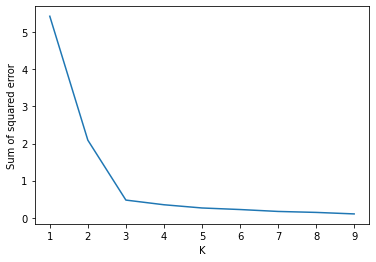

In [114]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Exercise

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
from sklearn.datasets import load_iris

In [186]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [187]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [192]:
data1 = pd.DataFrame(data['data'], columns=data['feature_names'])
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [200]:
df = data1.iloc[:,2:]
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


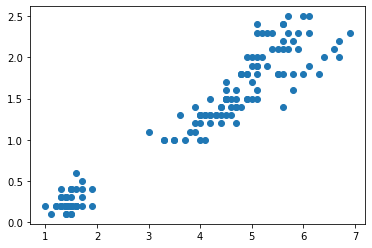

In [201]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [202]:
from sklearn.cluster import KMeans

In [203]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [204]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [205]:
df['cluster'] = y_predicted
df.head()

C:\Users\Arayan\AppData\Local\Temp\ipykernel_12728\868506453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_predicted


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [206]:
df.cluster.value_counts()

0    99
1    51
Name: cluster, dtype: int64

In [207]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]

In [208]:
df1.head()

,petal length (cm),petal width (cm),cluster
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0


In [209]:
len(df1),len(df2)

(99, 51)

Text(0, 0.5, 'Petal Width')

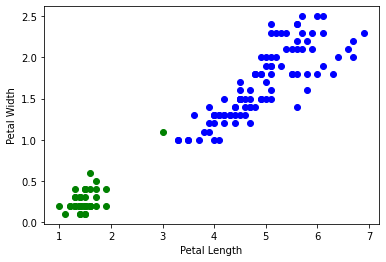

In [210]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='b')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='g')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [211]:
from sklearn.preprocessing import MinMaxScaler

In [212]:
scalar = MinMaxScaler()

In [213]:
scalar.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scalar.transform(df[['petal length (cm)']])

scalar.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scalar.transform(df[['petal width (cm)']])

C:\Users\Arayan\AppData\Local\Temp\ipykernel_12728\3014813366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['petal length (cm)'] = scalar.transform(df[['petal length (cm)']])
C:\Users\Arayan\AppData\Local\Temp\ipykernel_12728\3014813366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['petal width (cm)'] = scalar.transform(df[['petal width (cm)']])


In [214]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [220]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [224]:
km.cluster_centers_

array([[0.6620339 , 0.65666667],
       [0.07830508, 0.06083333]])

In [226]:
km.cluster_centers_[:,0]

array([0.6620339 , 0.07830508])

In [221]:
df['cluster'] = y_predicted
df.head()

C:\Users\Arayan\AppData\Local\Temp\ipykernel_12728\868506453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_predicted


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [222]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]

Text(0, 0.5, 'Petal Width')

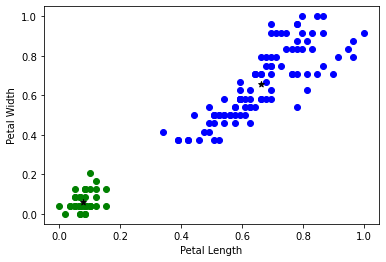

In [230]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='b')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='g')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='black', marker='*', label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [232]:
sse = []

reg = range(1,10)

for k in reg:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\Arayan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [233]:
sse

[28.368353219727197,
 5.176463590044368,
 1.701874688192097,
 1.1588792731667126,
 0.8538617353912241,
 0.6800800986587509,
 0.566351649289804,
 0.48617893493425113,
 0.4412240309315699]

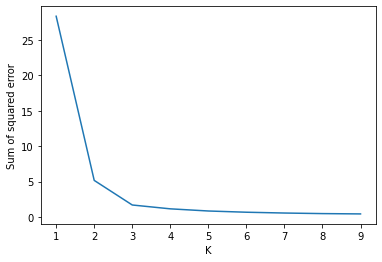

In [234]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(reg,sse)